In [29]:
import os
import sys
import glob
import keras
import pprint
import sklearn
import ipywidgets
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.neural_network import MLPRegressor

from keras.models import Sequential
from keras.layers import Dense, Activation

from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider, Checkbox
from IPython.display import display

from matplotlib.ticker import StrMethodFormatter
from matplotlib import cm

import time
import talib
import random
import joblib
from sys import maxsize
from datetime import datetime

import importlib

print('Python version:{}'.format(sys.version))
print('Numpy version:{}'.format(np.__version__))
print('Pandas version:{}'.format(pd.__version__))
print('Keras version:{}'.format(keras.__version__))
print('Tensorflow version:{}'.format(tf.__version__))
print('Sci-Kit Learn version:{}'.format(sklearn.__version__))

import modules.datareader
from modules.datareader import DataReader

import modules.experiment
from modules.experiment import Experiment

import modules.nn
from modules.nn import NN, KerasMLP

import modules.trader
from modules.trader import Trader

import modules.randomer
from modules.randomer import Randomer

import modules.plotter
from modules.plotter import Plotter


import modules.fuk
from modules.fuk import plot_trade_adv
from modules.fuk import create_animated_mp4
from modules.fuk import save_model_trader_results
from modules.fuk import run_info

def reload():
    importlib.reload(modules.datareader)
    importlib.reload(modules.nn)
    importlib.reload(modules.fuk)
    importlib.reload(modules.trader)
    importlib.reload(modules.plotter)
    importlib.reload(modules.experiment)

reload()

Python version:3.8.10 (default, Nov 14 2022, 12:59:47) 
[GCC 9.4.0]
Numpy version:1.23.5
Pandas version:1.3.5
Keras version:2.10.0
Tensorflow version:2.10.0
Sci-Kit Learn version:1.0.2


In [30]:
!ls -la NightRuns/

total 76
drwxrwxr-x 17 ubuntu ubuntu  4096 Feb 21 21:05 .
drwxrwxr-x 12 ubuntu ubuntu 12288 Feb 21 21:07 ..
drwxrwxr-x  2 ubuntu ubuntu  4096 Feb 20 08:25 .ipynb_checkpoints
drwxrwxr-x  4 ubuntu ubuntu  4096 Feb 20 08:27 20230220-055652
drwxrwxr-x  4 ubuntu ubuntu  4096 Feb 20 13:16 20230220-125817
drwxrwxr-x  2 ubuntu ubuntu  4096 Feb 21 10:33 20230221-103321
drwxrwxr-x  2 ubuntu ubuntu  4096 Feb 21 19:09 20230221-190925
drwxrwxr-x  2 ubuntu ubuntu  4096 Feb 21 19:13 20230221-191332
drwxrwxr-x  2 ubuntu ubuntu  4096 Feb 21 19:36 20230221-193610
drwxrwxr-x  2 ubuntu ubuntu  4096 Feb 21 19:38 20230221-193805
drwxrwxr-x  2 ubuntu ubuntu  4096 Feb 21 19:39 20230221-193906
drwxrwxr-x  2 ubuntu ubuntu  4096 Feb 21 19:56 20230221-195640
drwxrwxr-x  2 ubuntu ubuntu  4096 Feb 21 20:50 20230221-205016
drwxrwxr-x  2 ubuntu ubuntu  4096 Feb 21 20:52 20230221-205206
drwxrwxr-x  2 ubuntu ubuntu  4096 Feb 21 20:53 20230221-205325
drwxrwxr-x  2 ubuntu ubuntu  4096 Feb 21 20:55 20230221-205517
drwxrwx


```
# JoDeMiro
```


In [31]:
file_base = '20230220-001829_burtalw1'
file_base = '20230220-005904'
file_base = 'NightRuns/20230220-055652/20230220-055652'
file_base = 'NightRuns/20230221-210550/20230221-210550'


file_name = file_base + '_model.joblib'
model = joblib.load(file_name)

print(type(model))

file_name = file_base + '_trader.joblib'
trader = joblib.load(file_name)

print(type(trader))

file_name = file_base + '_generation_holder.joblib'
generation_holder = joblib.load(file_name)

print(type(generation_holder))

file_name = file_base + '_result.joblib'
result = joblib.load(file_name)

print(type(result))

file_name = file_base + '_conf.joblib'
conf = joblib.load(file_name)

print(type(conf))

<class 'sklearn.neural_network._multilayer_perceptron.MLPRegressor'>
<class 'modules.trader.Trader'>
<class 'list'>
<class 'dict'>
<class 'dict'>


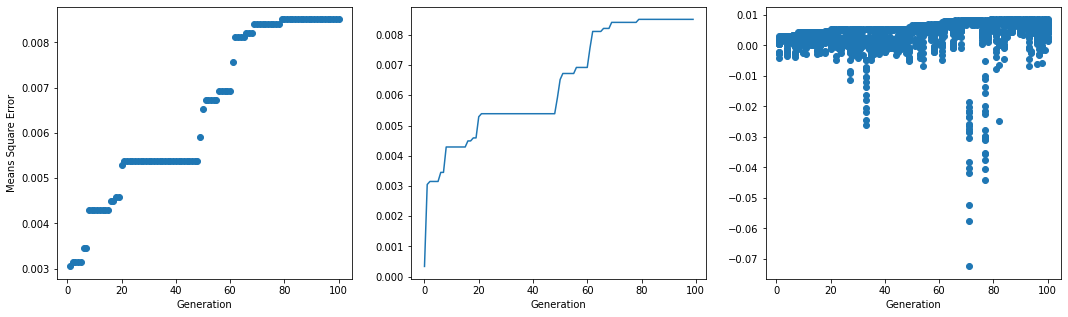

In [32]:
plotter = Plotter(result)

plotter.plot_results(2000, True)

In [33]:
_max = IntSlider(min=40, max=800, step=1, value=120)

interact(plotter.plot_results, _max=_max, _show_mid=True, _show_avg=True);

interactive(children=(IntSlider(value=120, description='_max', max=800, min=40), Checkbox(value=True, descript…

In [34]:

# meg van minden -> nézzük meg milyen lépéseket kell tennem ahoz, hogy a test adatokon is lefusson


## Test the model on extended data

Experimental

Sajnos a normalizáció miatt el fog csúszni, ezért az lenne az igazi, hogy ha a normalizációt nem csinálnám meg rajta.

In [35]:
conf

{'TRADE_COST': 0.00016,
 'THRESHOLD': 0.0,
 'TH': 0.4,
 'internal_plotting': True,
 'repeatable': True,
 're_learn': False,
 'save_interval': 100,
 'generation': 100,
 'population': 20,
 'factor_weight': 0,
 'factor_intercept': 0,
 'variable_factor': True,
 'factor_min': 1,
 'factor_max': 200,
 'keep_best': True,
 'select_ratio_weight': 1,
 'select_ratio_bias': 1,
 'variable_select_ratio': True,
 'select_ratio_min': 0.1,
 'select_ratio_max': 0.2,
 'setup': {'INDICATORS': ['ROC1',
   'ROC2',
   'ROC3',
   'RSI14',
   'RSI28',
   'MACD',
   'MA50BIN',
   'MA50DIS',
   'MA100BIN',
   'MA100DIS',
   'MA200BIN',
   'MA200DIS',
   'LIN30',
   'LIN50',
   'RSIHL'],
  'WINDOW': 10,
  'DIFF_MULTIPLIER': 10,
  'INPUT_MULTIPLIER': 10}}

In [36]:
conf.keys()
conf.get('setup')

DIFF_MULTIPLIER = conf.get('setup')['DIFF_MULTIPLIER']
INPUT_MULTIPLIER = conf.get('setup')['INPUT_MULTIPLIER']

WINDOW = conf.get('setup')['WINDOW']

INDICATORS = conf.get('setup')['INDICATORS']

There are 5599999 rows and 1 columns
   1.355499999999999927e+00
0                    1.3555
1                    1.3562
2                    1.3560
3                    1.3563
4                    1.3562
------------------------------------------------------------------------------
(5599999, 2)
(5599999, 1)
(5599999, 1)
------------------------------------------------------------------------------
(5599999, 1)
(5599999,)
(5599999, 1)
indcator section
------------------------------------------------------------------------------
Set window = 10
------------------------------------------------------------------------------
The train x_train 5599989, and the labels 5599989
(5599989, 10, 23) (5599989, 1)
x_train.nbytes =  10303979.76 Kbyte
x_train.nbytes =  10303.97976 Mbyte
------------------------------------------------------------------------------


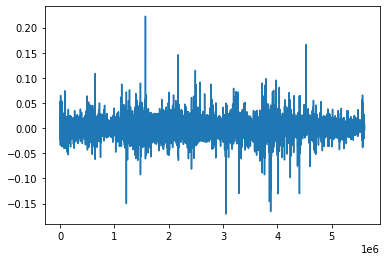

In [38]:

test_data_reader = DataReader(nRowsRead=5700000)                                 # <-- instantiate DataReader (set number of rows for data)

# test_data_reader.load_with_pandas(path = './input/eurusd_minute.csv')           # <-- read a particular files from disk (return with df, but also set self)


test_data_reader.load_with_pandas(path = './temp/56.csv')
test_data_reader.df = test_data_reader.df.rename({test_data_reader.df.columns[0]: 'BC'}, axis=1)
test_data_reader.df['Date'] = np.arange(0, test_data_reader.df['BC'].size, 1) # az elötte lévő sorral együtt kel (!)


test_data_reader.cut(0, 5700000)                                                 # <-- cut from to (start, to)

# test_data_reader.info()                                                       # <-- my own info() function

# test_data_reader.df.info()                                                    # <-- call pandas built-in info() function

test_data_reader.set_target()                                                   # <-- prepare is setter convert pandas to numpy and set target variable

# test_data_reader.show_array_info()

test_data_reader.create_diff(DIFF_MULTIPLIER)        # innentől self.input

test_data_reader.remove_price()

test_data_reader.input = test_data_reader.input * INPUT_MULTIPLIER

test_data_reader.create_indicators(extended=True, indicators=INDICATORS)



# test_data_reader.normalize_values()
test_data_reader.normalize_values()



test_data_reader.set_window(WINDOW)                                                      # <-- set window size

test_data_reader.create_train_set()                                             # <-- prepare egyik legfontossab metódusa (sok transzformációval)


In [39]:

TRADE_COST = conf['TRADE_COST']
THRESHOLD  = conf['THRESHOLD']
TH = conf['TH']

print('TH        ', TH)
print('TRADE_COST', TRADE_COST)

trader = Trader(threshold=THRESHOLD,
                data_reader=test_data_reader,
                trade_cost=TRADE_COST,
                th=TH,
                debug=False)

TH         0.4
TRADE_COST 0.00016


In [40]:
# 0.24932000000000176

In [41]:
# A globalisan legjobb megoldás alapján csináljuk meg a becslést
test_pred = model.predict(
    test_data_reader.x_train)  # <-- kiértékeléshez és vizualizációhoz

# Végül minden esetben updateljük a trader.result-ot azáltal, hogy meghívjuk a következőt
replayed_result = trader.calculator_np(test_pred)

replayed_result

{'buy_count': 15131, 'sell_count': 15131, 'gain': -2.356829999999998}

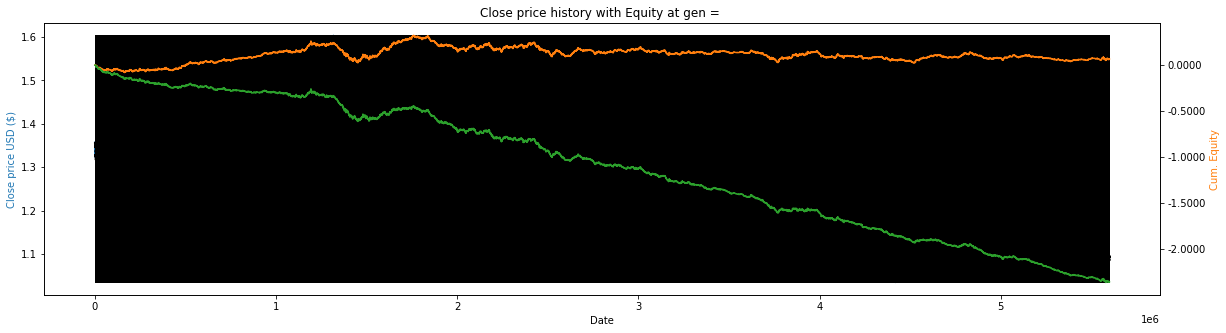

In [42]:

plot_trade_adv(trader, _from=0, _back=0, window=trader.window, step=True)


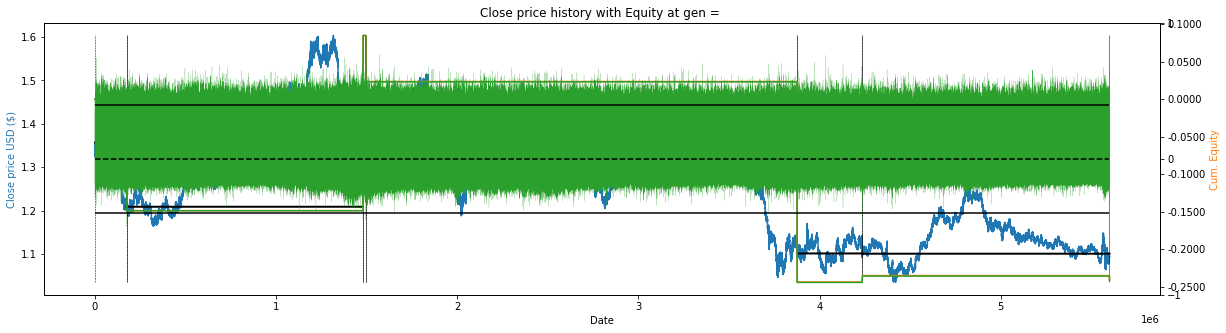

In [223]:

plot_trade_adv(trader, trader_signal=test_pred, window=trader.window, _from=0, _back=0)


[23 10  5  1]


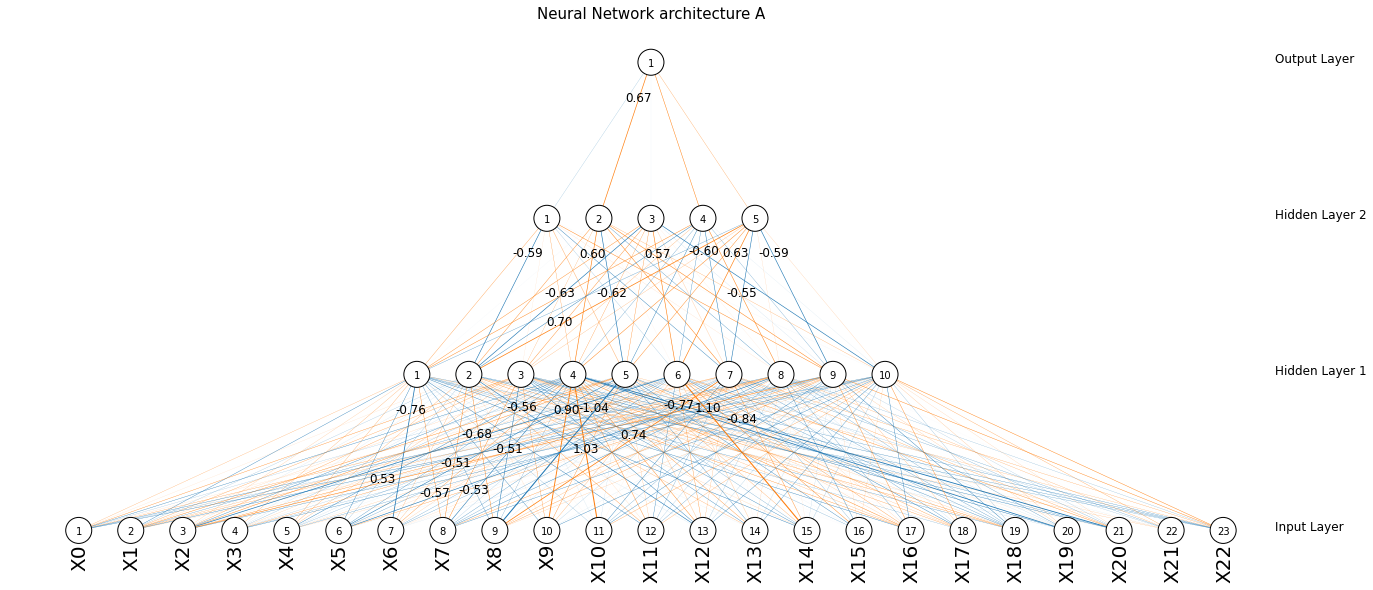

In [224]:
# create plotter
plotter = Plotter(trader.result)

plotter.vshow(result['best_generation_solution'])

# elkérhetem így is (u.a)
# plotter.vshow(model)

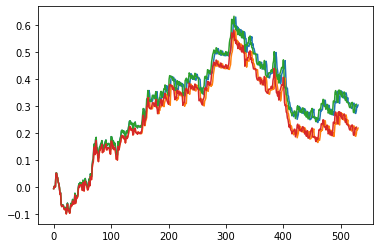

In [192]:
# nincs rajta a kötési költség azért tündököl ilyen szépen

trader.result.keys()
_raw_eq = np.cumsum(trader.result['sell_price']-trader.result['buy_price'])
plt.plot(_raw_eq)

_net_eq = np.cumsum(trader.result['sell_price']-trader.result['buy_price']-trader.trade_cost)
plt.plot(_net_eq)

#leveszem a nagyon rövid tradeket
_min = 30
_raw_eq_min = np.cumsum(trader.result['sell_price'][trader.result['trade_length'] > _min] - 
              trader.result['buy_price'][trader.result['trade_length'] > _min])
plt.plot(_raw_eq_min)

_net_eq_min = np.cumsum(trader.result['sell_price'][trader.result['trade_length'] > _min] - 
              trader.result['buy_price'][trader.result['trade_length'] > _min] - trader.trade_cost)
plt.plot(_net_eq_min)
# sajnos a rövid tradek adnak sok profitot

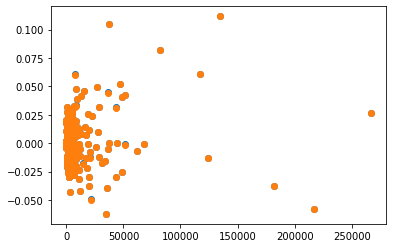

In [157]:
# profit tradenként és tradek hossz aközötti öszfüg

t_raw_prof = trader.result['sell_price'] - trader.result['buy_price']
t_net_prof = trader.result['sell_price'] - trader.result['buy_price'] - trader.trade_cost
tlen  = trader.result['trade_length']
plt.scatter(tlen, t_raw_prof)
plt.scatter(tlen, t_net_prof)

(array([ 3., 11., 39., 78., 59., 15.,  6.,  2.,  1.,  2.]),
 array([-0.06223, -0.04485, -0.02747, -0.01009,  0.00729,  0.02467,
         0.04205,  0.05943,  0.07681,  0.09419,  0.11157]),
 <BarContainer object of 10 artists>)

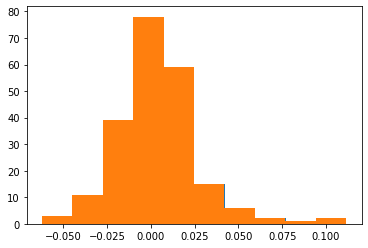

In [158]:
# jó lenne látni a profit eloszlását is

plt.hist(t_raw_prof)
plt.hist(t_net_prof)

(array([[  2.,   8., 124., 150.,  24.,   4.,   0.,   0.,   0.,   0.],
        [  1.,   3.,  29.,  38.,  13.,   1.,   0.,   0.,   0.,   1.],
        [  1.,   6.,  18.,  17.,  14.,   2.,   2.,   0.,   0.,   0.],
        [  1.,   0.,   1.,   3.,   6.,   2.,   1.,   0.,   0.,   1.],
        [  0.,   0.,   1.,   4.,   2.,   3.,   1.,   0.,   0.,   0.],
        [  0.,   0.,   2.,   4.,   2.,   1.,   1.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([2.70000e+01, 4.94060e+03, 9.85420e+03, 1.47678e+04, 1.96814e+04,
        2.45950e+04, 2.95086e+04, 3.44222e+04, 3.93358e+04, 4.42494e+04,
        4.91630e+04]),
 array([-0.0516 , -0.03561, -0.01962, -0.00363,  0.01236,  0.02835,
         0.04434,  0.06033,  0.07632,  0.09231,  0.1083 ]),
 

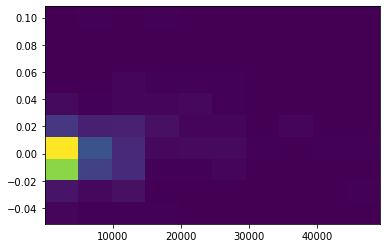

In [110]:
plt.hist2d(tlen, t_raw_prof)

In [111]:
_avg_trade_lenght = trader.result['trade_length'].mean()
print(f'átlagos trade hossz = {_avg_trade_lenght:0.2f}')

átlagos trade hossz = 5617.00


átlagos trade hossz 5617.0
átlagos trade hossz 889.6044444444444


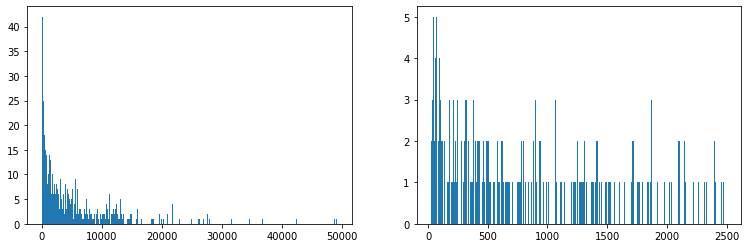

In [112]:
fig, ax = plt.subplots(1, 2, figsize=(6.4 * 2, 4))
_ = ax[0].hist(trader.result['trade_length'], bins=320)
_ = trader.result['trade_length']
print('átlagos trade hossz', _.mean())

_ = trader.result['trade_length']
_ = _[_ < 2500]
print('átlagos trade hossz', _.mean())
_ = ax[1].hist(_, bins=320)
plt.show()

In [63]:
print(f'avg =  {t_raw_prof.mean():.10f}')
print(f'max =  {t_raw_prof.max():.10f}')
print(f'min = {t_raw_prof.min():.10f}')

avg =  0.0000135995
max =  0.0505700000
min = -0.0883100000


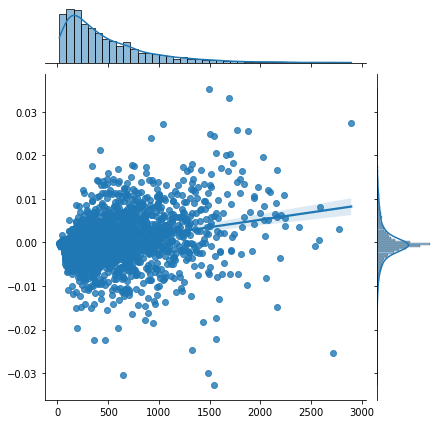

In [37]:
import seaborn as sns

sns.jointplot(x=tlen, 
              y=t_net_prof,
              kind='reg');

# plt.title("Scatter Plot with Marginal Histograms: Seaborn", size=18, pad=80)



```
# JoDeMiro
```
